In [2]:
import WhiteRealityCheckFor1 #you can ignore this for now
import detrendPrice #you can ignore this fornow
import pandas as pd
import numpy as np
from datetime import datetime
#pd.core.common.is_list_like = pd.api.types.is_list_like #datareader problem probably fixed in next version of datareader
#from pandas_datareader import data as pdr
#import yfinance as yf
#yf.pdr_override() # <== that's all it takes :-)

start_date = '2000-01-01' 
end_date = '2018-12-31' 
#end_date = datetime.now() 

symbol = '^GSPC' 
msg = "" 
address = symbol + '.csv'

#try:
    #dfP = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)
    #dfP.to_csv(address, header = True, index=True, encoding='utf-8') 
#except Exception:
    #msg = "yahoo problem"
    #dfP = pd.DataFrame()

dfP = pd.read_csv(address, parse_dates=['Date'])
dfP = dfP.sort_values(by='Date')
dfP.set_index('Date', inplace = True)


dfP['42d'] = np.round(dfP['Close'].rolling(window=42).mean(),2)
dfP['252d'] = np.round(dfP['Close'].rolling(window=252).mean(),2)
print(dfP.tail)
print(dfP['42d'].tail)

<bound method NDFrame.tail of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971  1455.219971   
2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044  1399.420044   
2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985  1402.109985   
2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951  1403.449951   
2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971  1441.469971   
...                 ...          ...          ...          ...          ...   
2018-12-21  2465.379883  2504.409912  2408.550049  2416.620117  2416.620117   
2018-12-24  2400.560059  2410.340088  2351.100098  2351.100098  2351.100098   
2018-12-26  2363.120117  2467.760010  2346.580078  2467.699951  2467.699951   
2018-12-27  2442.500000  2489.100098  2397.939941  2488.830078  2488.830078   
2018-12-28  2498.77002

<Axes: xlabel='Date'>

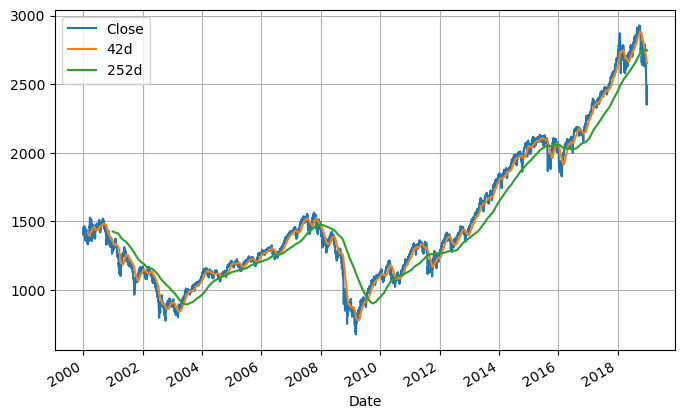

In [4]:
dfP[['Close','42d','252d']].plot(grid=True,figsize=(8,5))


In [3]:
dfP['42-252'] = dfP['42d'] - dfP['252d']


In [6]:
dfP.tail()

,Open,High,Low,Close,Adj Close,Volume,42d,252d,42-252
Date,,,,,,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,7609010000,2677.69,2750.36,-72.67
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,2613930000,2668.42,2749.04,-80.62
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,4233990000,2663.93,2748.18,-84.25
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078,2488.830078,4096610000,2658.77,2747.42,-88.65
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990,2485.739990,3702620000,2654.65,2746.64,-91.99
